In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import common
common.regression_test()

solve_haze_detection 2x1, 2 pixels: solve_haze_detection 2x1, 2 pixels: 0.0 seconds, 0.0 seconds CPU


# Low resolution haze detection v2

Results look good, but it requires subsampling and there's a 5000x performance cliff between 600 and 726 pixels, for the sample image
![Performance Chart](https://docs.google.com/spreadsheets/d/1VZqHtatv2zCw0UsI8FsD_WXfeI_6b4PR6LFLl-2Dnt8/pubchart?oid=801690291&format=image)

Source: https://docs.google.com/spreadsheets/d/1VZqHtatv2zCw0UsI8FsD_WXfeI_6b4PR6LFLl-2Dnt8/edit?gid=0#gid=0


(32, 50, 4)


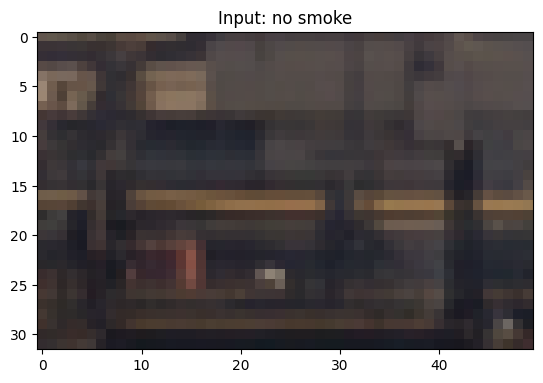

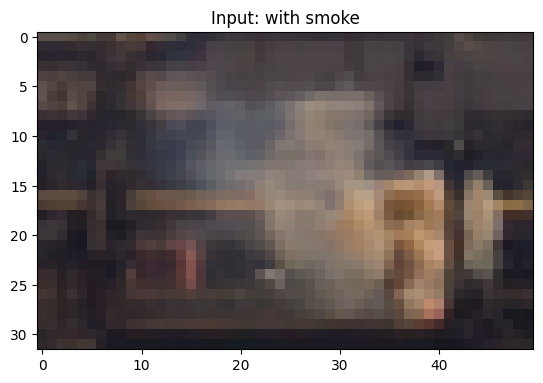

solve_haze_detection_v2 50x32, 1600 pixels: solve_haze_detection_v2 50x32, 1600 pixels: 5.6 seconds, 5.6 seconds CPU


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.1903658051944522e-33..212.02875776231215].


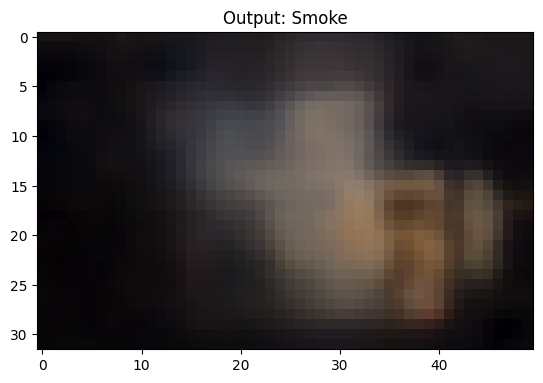

In [4]:
def low_resolution_haze_detection_v2():
    subsample = 8
    url0 = "https://thumbnails-v2.createlab.org/thumbnail?root=https%3A%2F%2Fbreathecam.org%2F%23v%3D4654%2C2127%2C4915%2C2322%2Cpts%26t%3D1015.36%26ps%3D0%26bt%3D20240519140924%26et%3D20240519140924%26startDwell%3D0%26endDwell%3D0%26d%3D2024-05-19%26s%3Dclairton4%26fps%3D9&width=400&height=300&format=png&fps=9&tileFormat=mp4&startDwell=0&endDwell=0&fromScreenshot&minimalUI"
    im0 = common.read_image_from_url(url0, subsample=subsample) / 255.0
    print(im0.shape)
    plt.title("Input: no smoke")
    plt.imshow(im0 * 255.0)
    plt.show()
    url1 = "https://thumbnails-v2.createlab.org/thumbnail?root=https%3A%2F%2Fbreathecam.org%2F%23v%3D4654%2C2127%2C4915%2C2322%2Cpts%26t%3D984.02%26ps%3D0%26bt%3D20240519135036%26et%3D20240519135036%26startDwell%3D0%26endDwell%3D0%26d%3D2024-05-19%26s%3Dclairton4%26fps%3D9&width=400&height=300&format=png&fps=9&tileFormat=mp4&startDwell=0&endDwell=0&fromScreenshot&minimalUI"
    im1 = common.read_image_from_url(url1, subsample=subsample) / 255.0
    plt.title("Input: with smoke")
    plt.imshow(im1 * 255.0)
    plt.show()
    haze_image = common.solve_haze_detection_v2(im0, im1)
    plt.title("Output: Smoke")
    plt.imshow(haze_image * 255.0)
    plt.show()

low_resolution_haze_detection_v2()